# Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

cancer = load_breast_cancer()
scaler = StandardScaler()
# feature들 scaling하기
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled,
                                                   cancer.target,
                                                   test_size=0.3,
                                                   random_state=2)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)

# roc_auc_score인자에는 실제값, 예측값 넣어주기
print(f"accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"roc_auc : {roc_auc_score(y_test, y_pred):.4f}")

accuracy : 0.9708
roc_auc : 0.9707


In [4]:
# GridSearchCV를 이용해 교차검증과 파라미터 튜닝하기
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')
# Logisitic Regression 파라미터로는 penalty(norm종류)와 C(1/alpha)값
# C값은 수치가 작을수록 alpha값이 커지면서 regularization이 강함!
params = {'penalty':['l2','l1'],
         'C':[0.01, 0.1, 1, 5, 10]}
lr_clf = LogisticRegression()
grid_clf = GridSearchCV(lr_clf, param_grid=params,
                       scoring='accuracy', cv=3)
grid_clf.fit(x_train, y_train)
print(f"최적의 파라미터 {grid_clf.best_params_} \n최적의 평균 정확도 {grid_clf.best_score_}")

최적의 파라미터 {'C': 0.1, 'penalty': 'l2'} 
최적의 평균 정확도 0.9773676615781879


# Enesemble - RegressionTree

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=500)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.94 -13.06 -19.7  -46.41 -18.9 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.44 6.81 4.35]
 5 교차 검증의 평균 RMSE : 4.406 


In [8]:
def get_model_cv_prediction(model, x_data, y_target):
    neg_mse_scores = cross_val_score(model, x_data, y_target,
                                    scoring='neg_mean_squared_error',
                                    cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('*'*7, model.__class__.__name__,'*'*7)
    print(f"5번 교차검증 후 평균 RMSE {avg_rmse:.4f}")

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=500)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgb_reg = LGBMRegressor(n_estimators=500)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

******* DecisionTreeRegressor *******
5번 교차검증 후 평균 RMSE 5.9780
******* RandomForestRegressor *******
5번 교차검증 후 평균 RMSE 4.4059
******* GradientBoostingRegressor *******
5번 교차검증 후 평균 RMSE 4.2633
[14:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
******* XGBRegressor *******
5번 교차검증 후 평균 RMSE 4.0676
******* LGBMRegressor *******
5번 교차검증 후 평균 RMSE 4.6306


<AxesSubplot:>

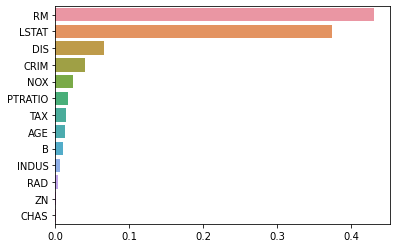

In [11]:
# RandomForestRegressor에서 feature별 중요도 시각화해보기
import seaborn as sns
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(feature_series, y=feature_series.index)

(100, 2)


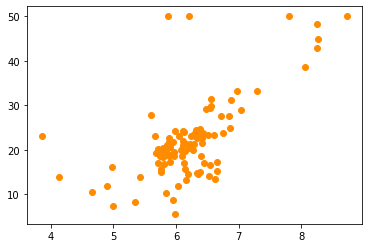

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

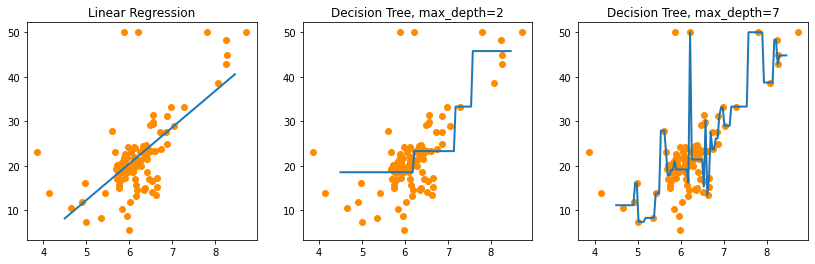

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# test 데이터를 X축으로 하고 시각화
# 선형회귀식 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,
           c='darkorange')
    #화귀식 그리기
ax1.plot(X_test, pred_lr, label='Linear', linewidth=2)
# DecisionTree의 max_depth=2 일때
ax2.set_title('Decision Tree, max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,
           c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth=2', linewidth=2)
# DecisionTree의 max_depth=7 일때
ax3.set_title('Decision Tree, max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE,
           c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth=7', linewidth=2)
